# Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston, load_digits, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Neural Networks with scikit-learn
There is a basic implementation of neural networks in scikit-learn than you can use for prototyping and getting familiar with the concepts. Because it doesn't have GPU support, it's not really appropriate for larger applications.

Neural networks are implemented in the ``MLPClassifier`` and ``MLPRegressor`` classes in the ``sklearn.neural_networks`` module.
There are two standard solvers implemented: ``'adam'`` (the default) and ``'l-bfgs'``. ``'l-bfgs'`` might work better on very small toy datasets.

### Task 1
Create a synthetic "two moons" dataset, and visualize the decision boundary when varying the number of hidden units, the non-linearity, and the random state.
What do you notice?

In [2]:
def plot_2d_classification(classifier, X, ax=None):                                       
                                                                                                            
    eps = X.std() / 2.
    if ax is None:
        ax = plt.gca()                                                                                                           
    
    # create a dense grid of values to evaluate the classifier
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         
    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    # evaluate the classifier on the grid
    decision_values = classifier.predict(X_grid)
    # show the classification results:
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=.5)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)

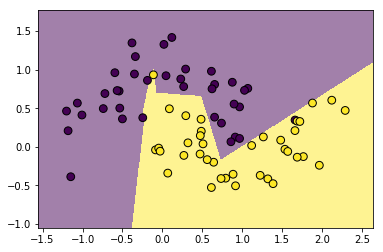

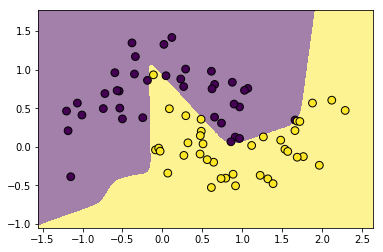

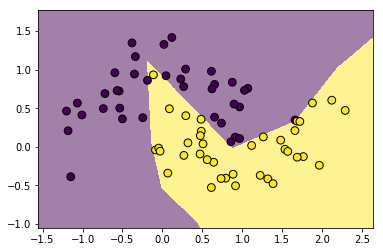

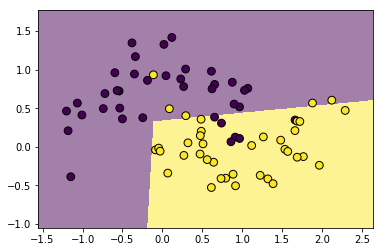

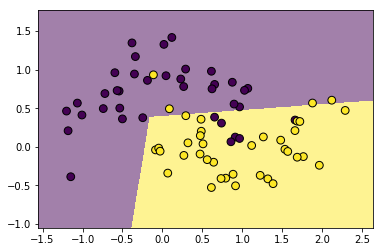

In [4]:
# todo: create subplots with multiple random states, different non-linearities and different numbers of hidden units
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')
plt.show()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=0, activation="tanh").fit(X_train, y_train)
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')
plt.show()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), random_state=10).fit(X_train, y_train)
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')
plt.show()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,), random_state=0).fit(X_train, y_train)
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')
plt.show()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,), random_state=10).fit(X_train, y_train)
plot_2d_classification(mlp, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor='k')
plt.show()

### Task 2
Apply ``MLPRegressor`` to the boston housing dataset. Does it do better or worse than Ridge (yesterday).

Try the model with and without scaling the data.

In [5]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

mlpr = MLPRegressor(solver="lbfgs", hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
print("Before scaling")
print(mlpr.score(X_train, y_train))
print(mlpr.score(X_test, y_test))

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpr = MLPRegressor(solver="lbfgs", hidden_layer_sizes=(10,), random_state=0).fit(X_train_scaled, y_train)
print("After scaling")
print(mlpr.score(X_train_scaled, y_train))
print(mlpr.score(X_test_scaled, y_test))

Before scaling
0.6958720431611527
0.5387381402149708
After scaling
0.9638617641082518
0.7095577235314281


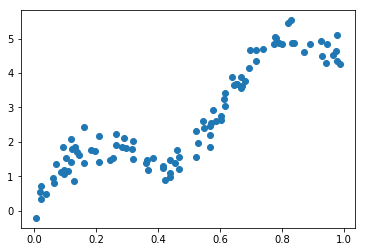

In [6]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')
plt.show()

In [7]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [8]:
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

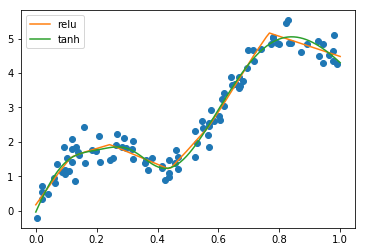

In [9]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [10]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)

In [16]:
print("Train score = {:.3f}".format(mlp.score(X_train, y_train)))
print("Test score = {:.3f}".format(mlp.score(X_test, y_test)))

Train score = 1.000
Test score = 0.980


## Keras
Now let's work with the much more flexible and efficient Keras library (which is using TensorFlow in the backend)
A simple way to work with keras is to build up models using the ``Sequential`` class.

The model below corresponds to mulinomial logistic regression. Run it on the ``digits`` dataset.


In [17]:
digits = load_digits()
# We divide the data by 16 to make sure it's on a reasonable scale (between zero and one)
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target, random_state=0)

num_classes = 10
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
model = Sequential([
    Dense(10, input_shape=(64,)),
    Activation('softmax'),
])

In [19]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In keras, the ``fit`` method takes options like the number of epochs (iterations) to run, and whether to use a validation set for early stopping.

In [22]:
history_callback = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=.1)

Train on 1212 samples, validate on 135 samples
Epoch 1/10
1212/1212 [==============================] - 0s 337us/step - loss: 2.3839 - acc: 0.1048 - val_loss: 2.2506 - val_acc: 0.1185
Epoch 2/10
1212/1212 [==============================] - 0s 46us/step - loss: 2.1711 - acc: 0.1815 - val_loss: 2.0749 - val_acc: 0.2815
Epoch 3/10
1212/1212 [==============================] - 0s 57us/step - loss: 2.0051 - acc: 0.3086 - val_loss: 1.9235 - val_acc: 0.4148
Epoch 4/10
1212/1212 [==============================] - 0s 47us/step - loss: 1.8568 - acc: 0.4662 - val_loss: 1.7794 - val_acc: 0.5185
Epoch 5/10
1212/1212 [==============================] - 0s 44us/step - loss: 1.7187 - acc: 0.5899 - val_loss: 1.6499 - val_acc: 0.6519
Epoch 6/10
1212/1212 [==============================] - 0s 53us/step - loss: 1.5952 - acc: 0.6889 - val_loss: 1.5311 - val_acc: 0.7333
Epoch 7/10
1212/1212 [==============================] - 0s 57us/step - loss: 1.4818 - acc: 0.7558 - val_loss: 1.4238 - val_acc: 0.7630
Epoch 8

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 1.202
Test Accuracy: 0.818


Here is a nice way to visualize the history of training the model:

In [24]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

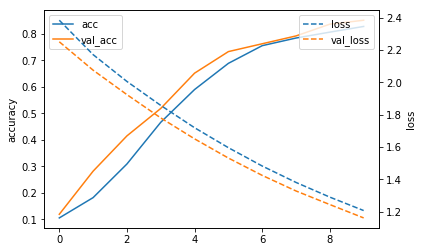

In [25]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

### Task
Add an additional hidden layer with a ``relu`` non-linearity and fit the new model (``Dense(20, activation='relu')``. Experiment with different layer sizes and different numbers of additional layers.

#### Shallow model

In [44]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax'))
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model.summary()
history_callback = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.105
Test Accuracy: 0.971


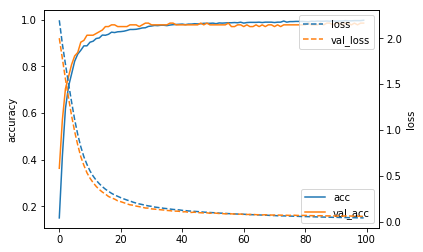

In [46]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

#### Deeper model

In [47]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(64,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model.summary()
history_callback = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
Total params: 1,930
Trainable params: 1,930
Non-trainable params: 0
_________________________________________________________________


In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.132
Test Accuracy: 0.960


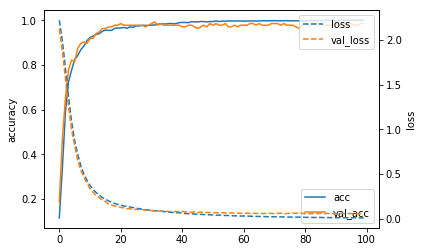

In [49]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

#### Wider model

In [50]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(64,)))
model.add(Dense(10, activation='softmax'))
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
model.summary()
history_callback = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.091
Test Accuracy: 0.978


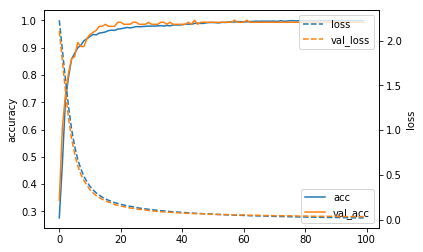

In [52]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()